In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
df.columns


Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [9]:
df.shape

(8744, 41)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y = le.fit_transform(df['koi_disposition'])
y_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
y_mappings


{0: 'CANDIDATE', 1: 'CONFIRMED', 2: 'FALSE POSITIVE'}

C:\Users\gairo\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.12659406 0.14083862 0.12458214 0.05616481 0.01978465 0.01204018
 0.01435139 0.01437014 0.01866374 0.02295592 0.01372954 0.0146917
 0.01209387 0.01686061 0.02383774 0.02244833 0.01464554 0.01113424
 0.01231456 0.01939975 0.01213374 0.01647939 0.02027168 0.0095049
 0.00900277 0.00882646 0.04866726 0.01640562 0.0104778  0.0209387
 0.01996173 0.00899694 0.01069141 0.01512017 0.00896553 0.01252173
 0.00924216 0.01065673 0.00936703 0.01026674]


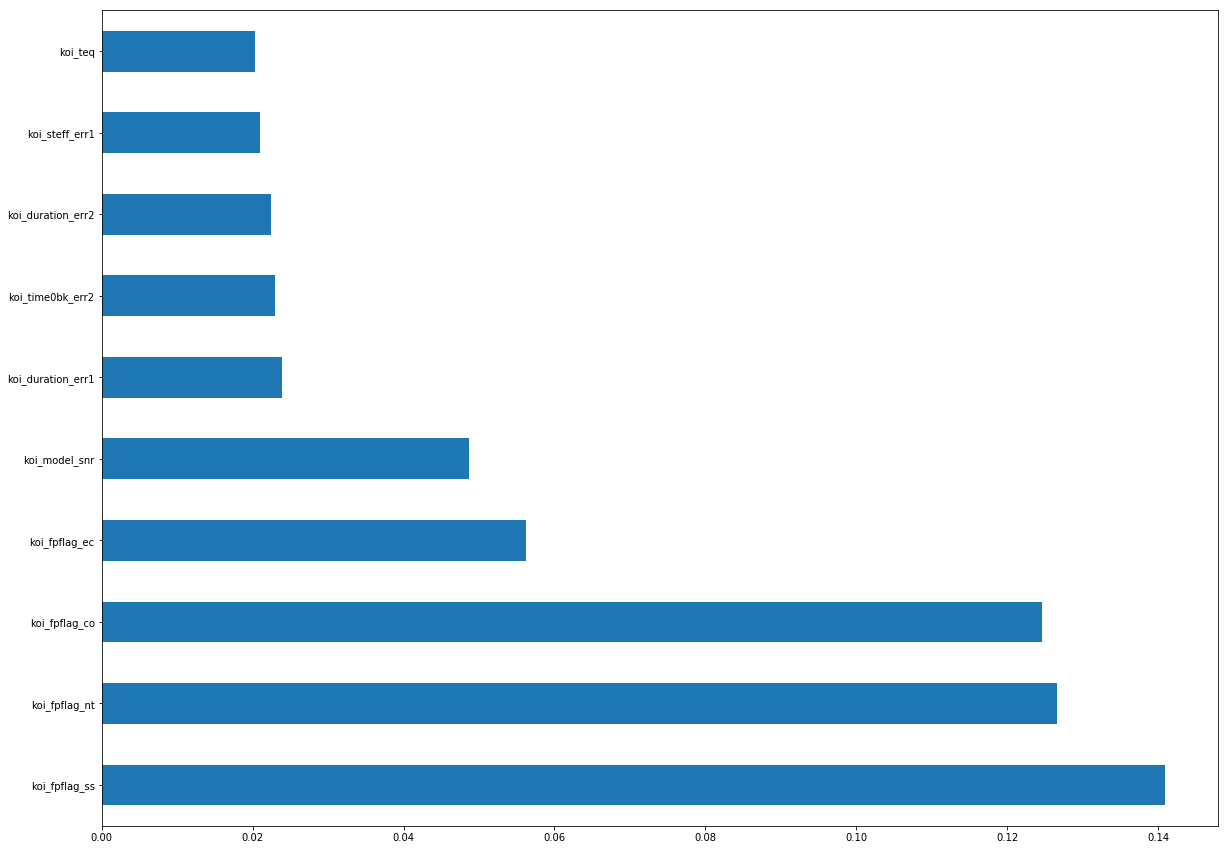

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X=df.iloc[:,1:]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(20,15))
plt.show()

In [12]:
# selection of features 
X=X[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_duration_err1','koi_depth','koi_duration',
     'koi_model_snr','koi_period','koi_fpflag_ec','koi_duration_err2','koi_steff_err1','koi_time0bk_err1']].values
X.shape


(8744, 13)

Splitting Testing and Training Data

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_test_2 =scaler.transform(X_test_2)
X_train_2=scaler.transform(X_train_2)

Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


model1=RandomForestClassifier(n_estimators=200)
model1.fit(X_train,y_train)

model1_train_score = model1.score(X_train,y_train)
model1_test_score = model1.score(X_test,y_test)
print(f'Model without tunning \n Train Score : {model1_train_score} \n Test Score : {model1_test_score}')
model1.score(X_train_2,y_train_2)


Model without tunning 
 Train Score : 1.0 
 Test Score : 0.8870082342177493


0.9716376944190301

In [24]:
parameters ={'max_depth':[3,5,10,None],
             'n_estimators':[100,200],
             'max_features':[1,4,8,7]}
model = RandomForestClassifier()
grid_search =GridSearchCV(estimator=model,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)
score_train=grid_search.score(X_train,y_train)                                                
score_test=grid_search.score(X_test,y_test)
  

best_params=grid_search.best_params_

print(f'Scores after Tunning \n Score of train data is: {score_train} \n Score of test data is: {score_test} \n Best Params are : {best_params}')
score2 =grid_search.score(X_test_2,y_test_2)
print(score2)

Scores after Tunning 
 Score of train data is: 0.9260445257700518 
 Score of test data is: 0.8906678865507777 
 Best Params are : {'max_depth': 10, 'max_features': 7, 'n_estimators': 100}
0.9121683440073193


Another Classifier model

SVM Classifier

In [20]:

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

model = SVC(kernel='linear',random_state=0)
model.fit(X_train,y_train)

y_train_pred= model.predict(X_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
score_train = accuracy_score(y_train,y_train_pred)
score = accuracy_score(y_test,y_pred)
print(f'Model without tunning \n Train Score : {score_train} \n Test Score : {score}')
#using Grid Search
                                                   
parameters = [{'C':[1,52,10],'degree':[3,8],'coef0':[.001,10,.05],'kernel':['linear','rbf','poly','sigmoid'],'gamma':['auto','scale']}]


grid_search =GridSearchCV(estimator=model,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)
score_train=grid_search.score(X_train,y_train)                                                
score_test=grid_search.score(X_test,y_test)
  

best_params=grid_search.best_params_

print(f'\n Score of data after tunning \n Score of train data is: {score_train} \n Score of test data is: {score_test} \n Best Params are : {best_params}')
score2 =grid_search.score(X_test_2,y_test_2)
print(score2)               

[[ 269  234    8]
 [  81  491   16]
 [   3    0 1084]]
Model without tunning 
 Train Score : 0.8502592253735896 
 Test Score : 0.8435498627630376

 Score of data after tunning 
 Score of train data is: 0.8905154010369015 
 Score of test data is: 0.8778591033851784 
 Best Params are : {'C': 52, 'coef0': 10, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly'}
0.8828911253430924


In [18]:
grid_search.score(X_train_2,y_train_2)

0.8888380603842635

In [21]:
grid_search.score(X_test_2,y_test_2)

0.8828911253430924